In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# I take IPL(2008-2020), Kaggle Data Set to perform One Hot Encoder and Target/Mean Encoding and compare which one is more useful for us.# 

# I perform minimum EDA and most of work done on feature engineering

In [2]:
df = pd.read_csv("IPL Matches 2008-2020.csv")
df.sample(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
276,548334,Mumbai,2012-04-22,SE Marsh,Wankhede Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,wickets,6.0,N,NaN,S Ravi,RJ Tucker
20,336002,Hyderabad,2008-05-25,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,Asad Rauf,RE Koertzen
312,548372,Delhi,2012-05-17,CH Gayle,Feroz Shah Kotla,0,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils,field,Royal Challengers Bangalore,runs,21.0,N,NaN,HDPK Dharmasena,C Shamshuddin
577,1082591,Hyderabad,2017-04-05,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
211,501235,Jaipur,2011-05-01,LRPL Taylor,Sawai Mansingh Stadium,0,Rajasthan Royals,Pune Warriors,Rajasthan Royals,field,Rajasthan Royals,wickets,6.0,N,NaN,SK Tarapore,SJA Taufel


In [3]:
df.shape

(816, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# 1) Data cleansing

In [5]:
df.drop(['id','date','player_of_match','umpire1', 'umpire2','toss_winner'], axis=1,inplace=True)
df.sample(2)

,city,venue,neutral_venue,team1,team2,toss_decision,winner,result,result_margin,eliminator,method
110,Centurion,SuperSport Park,1,Delhi Daredevils,Mumbai Indians,field,Delhi Daredevils,wickets,4.0,N,NaN
282,Delhi,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,field,Delhi Daredevils,runs,37.0,N,NaN


* Hmko Winner predict karna hai jo columns ka koi connection winning ke sath nahi hai hm un sb ko drop krenge
* jaise 'date','player_of_match', 'umpire1', 'umpire2'
* mene 'player_of_match' ko drop kia hai kyuki vo match ke baad decided hota hai or players match khelte umpire nahi isliye umpires ko drop kia hai
* Me yaha pe toss_winner column ko drop karunga kyuki humare pass ek column or bhi hai jisme yahi same information hai ki kis team ne batting ki or kis team ne feilding 'toss_decision' column
* "toss_winner" column me nominal data hai is liye itna frak nahi pdega agar ordinal data hota toh hm drop nahi karte

In [6]:
df.isnull().sum()

city              13
venue              0
neutral_venue      0
team1              0
team2              0
toss_decision      0
winner             4
result             4
result_margin     17
eliminator         4
method           797
dtype: int64

In [7]:
df.result.value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [7]:
a = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (df.isna().sum()/df.shape[0]*100).tolist()]], 
           columns=df.columns, index=['NA Count', 'NA Percent']).transpose()

a.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,NA Percent
city,13,1.59%
venue,0,0.00%
neutral_venue,0,0.00%
team1,0,0.00%
team2,0,0.00%
toss_decision,0,0.00%
winner,4,0.49%
result,4,0.49%
result_margin,17,2.08%
eliminator,4,0.49%


In [8]:
null_percentage= (df.isnull().sum()/816)*100
null_percentage

city              1.593137
venue             0.000000
neutral_venue     0.000000
team1             0.000000
team2             0.000000
toss_decision     0.000000
winner            0.490196
result            0.490196
result_margin     2.083333
eliminator        0.490196
method           97.671569
dtype: float64

we see here 6 columns are very minimun null values so if we want then we use dropna() but I don't want to drop any data because the data contain only 816 records. So, every data is imporatnt. So, I decide to fill them.

# 2) Filling the missing values

In [9]:
df.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Port Elizabeth      7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

Here we see 'Mumbai' is the most frequent category so we use "Mumbai" in fullfill Nan Values

In [10]:
df.fillna({"city":"Mumbai"},inplace=True)

In [11]:
df.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

* We see here that a particular team won how many matches. But we can't appy same technique here.
* We compare rivalry teams which win more watches and accordingly we fill at 'Nan' values

In [12]:
df[df['winner'].isna()]

,city,venue,neutral_venue,team1,team2,toss_decision,winner,result,result_margin,eliminator,method
241,Delhi,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,bat,NaN,NaN,NaN,NaN,NaN
486,Bangalore,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN
511,Bangalore,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,field,NaN,NaN,NaN,NaN,NaN
744,Bengaluru,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN


In [13]:
df.loc[241,["winner","result"]] = "Delhi Daredevils"
df.loc[486,["winner","result"]] = "Royal Challengers Bangalore"
df.loc[511,["winner","result"]] = "Royal Challengers Bangalore"
df.loc[744,["winner","result"]] = "Royal Challengers Bangalore"

In [14]:
df[df['eliminator'].isna()]

,city,venue,neutral_venue,team1,team2,toss_decision,winner,result,result_margin,eliminator,method
241,Delhi,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,bat,Delhi Daredevils,Delhi Daredevils,NaN,NaN,NaN
486,Bangalore,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,field,Royal Challengers Bangalore,Royal Challengers Bangalore,NaN,NaN,NaN
511,Bangalore,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,field,Royal Challengers Bangalore,Royal Challengers Bangalore,NaN,NaN,NaN
744,Bengaluru,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,field,Royal Challengers Bangalore,Royal Challengers Bangalore,NaN,NaN,NaN


In [15]:
df.eliminator.value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

* There are only 2 categories in eliminator. We fill 'NaN'place with most frequent value which is N over here.

In [16]:
df.fillna({"eliminator":"N"},inplace=True)

In [17]:
df.result_margin.value_counts()

6.0      95
7.0      94
5.0      85
8.0      67
4.0      53
         ..
42.0      1
47.0      1
87.0      1
130.0     1
69.0      1
Name: result_margin, Length: 91, dtype: int64

* Hum 'result_margin' column me mean se value fill krenge jiske liye check karna padega ki data me outlier hai ya nahi
* Agar outliers honge toh hm median se value fill karenge

<AxesSubplot:ylabel='result_margin'>

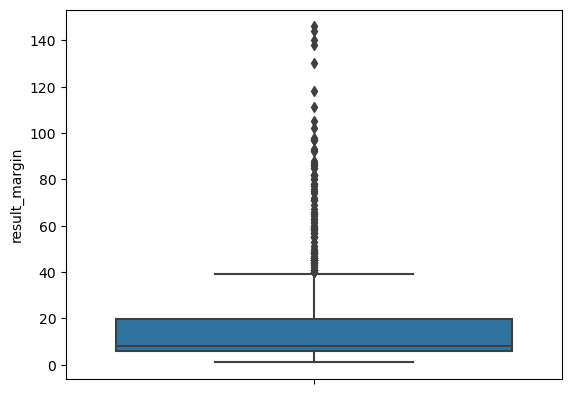

In [18]:
sns.boxplot(y='result_margin',data=df)

As we see their are so many outlier so we fill median value at 'Nan' place 

In [19]:
df['result_margin'].describe()

count    799.000000
mean      17.321652
std       22.068427
min        1.000000
25%        6.000000
50%        8.000000
75%       19.500000
max      146.000000
Name: result_margin, dtype: float64

As we see 50 percentile or median value is 8.0 so we fill it 

In [20]:
df.fillna({"result_margin":8.0},inplace=True)

In [21]:
df.method.value_counts()

D/L    19
Name: method, dtype: int64

* yaha pe hmko ye pta chal rha hai ki team ya toh direct jeeti hai ya fir match D/L method se jeeti hai
* Hum "Nan" ki jagah 'no_method_required' se fill krenge

In [22]:
df.fillna({"method":'no_method_required'},inplace=True)

In [23]:
df.isnull().sum()

city             0
venue            0
neutral_venue    0
team1            0
team2            0
toss_decision    0
winner           0
result           0
result_margin    0
eliminator       0
method           0
dtype: int64

We fill all the null values so we proceed to next step

# 3) Convert all Categorical Variables into Numerical

In [24]:
df.head(2)

,city,venue,neutral_venue,team1,team2,toss_decision,winner,result,result_margin,eliminator,method
0,Bangalore,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,140.0,N,no_method_required
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no_method_required


## * Jin columns me kam categories hai usme hum dummy variables use krenge
## * Jin columns me zyada categories hai usme hum One Hot Encoding use krenge
## * Jin columns me 2 categories hai usme hum (0,1) se replace krenge


In [25]:
df.shape

(816, 11)

Out of 11 column, 9 colunns are categorical

In [26]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

city : 32 labels
venue : 36 labels
neutral_venue : 2 labels
team1 : 15 labels
team2 : 15 labels
toss_decision : 2 labels
winner : 15 labels
result : 5 labels
result_margin : 91 labels
eliminator : 2 labels
method : 2 labels


* We use One Hot Encoding in:- 'city','venue','team1','team2','winner'
* We use Dummy Variables in:- 'toss_decision', 'result', 'eliminator', 'method'

# Replace categories with (0,1) where their is only 2 categories

In [27]:
df['toss_decision'] = df['toss_decision'].replace(['field','bat'], [0,1],regex=True)
df['method'] = df['method'].replace(['no_method_required','D/L'], [0,1],regex=True)
df['eliminator'] = df['eliminator'].replace(['N','Y'], [0,1],regex=True)
df.head(2)

,city,venue,neutral_venue,team1,team2,toss_decision,winner,result,result_margin,eliminator,method
0,Bangalore,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,0,Kolkata Knight Riders,runs,140.0,0,0
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,1,Chennai Super Kings,runs,33.0,0,0


In [28]:
df.shape

(816, 11)

# We create Dummy Variable for 'result' column.
# It contains 5 different categories

In [29]:
df.result.value_counts()

wickets                        435
runs                           364
tie                             13
Royal Challengers Bangalore      3
Delhi Daredevils                 1
Name: result, dtype: int64

* we select top 3 categories and drop remaining because remaining categories are invalid
* Team match kaise jeeti usme team ka naam dia hai...isliye hum drop krenge

In [30]:
df1 = pd.get_dummies(df['result'],prefix='result')
df1.sample(3)

,result_Delhi Daredevils,result_Royal Challengers Bangalore,result_runs,result_tie,result_wickets
696,0,0,0,0,1
686,0,0,1,0,0
340,0,0,1,0,0


In [31]:
df1.drop(['result_Delhi Daredevils'],axis=1,inplace=True)
df1.drop(['result_Royal Challengers Bangalore'],axis=1,inplace=True)

In [32]:
df = pd.concat([df,df1], axis=1)
df.sample(2)

,city,venue,neutral_venue,team1,team2,toss_decision,winner,result,result_margin,eliminator,method,result_runs,result_tie,result_wickets
245,Mumbai,Wankhede Stadium,0,Mumbai Indians,Kolkata Knight Riders,0,Mumbai Indians,wickets,4.0,0,0,0,0,1
8,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,0,Rajasthan Royals,wickets,3.0,0,0,0,0,1


In [33]:
df.drop(['result'],axis=1,inplace=True)
df.head(1)

,city,venue,neutral_venue,team1,team2,toss_decision,winner,result_margin,eliminator,method,result_runs,result_tie,result_wickets
0,Bangalore,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,0,Kolkata Knight Riders,140.0,0,0,1,0,0


In [34]:
df.shape

(816, 13)

# One Hot Encoding with multiple variables

In [35]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

city : 32 labels
venue : 36 labels
neutral_venue : 2 labels
team1 : 15 labels
team2 : 15 labels
toss_decision : 2 labels
winner : 15 labels
result_margin : 91 labels
eliminator : 2 labels
method : 2 labels
result_runs : 2 labels
result_tie : 2 labels
result_wickets : 2 labels


In [36]:
df.city.value_counts()

Mumbai            114
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Port Elizabeth      7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

We take only top 7 categories

In [37]:
counts = df['city'].value_counts()

In [38]:
df['city'].nunique()
threshold = 50

In [39]:
repl = counts[counts <= threshold].index

In [40]:
df1 = pd.get_dummies(df['city'].replace(repl, 'uncommon_city'),drop_first=True,prefix='city')
df1.sample(3)

,city_Chandigarh,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_uncommon_city
187,0,0,0,0,0,1,0
589,0,0,0,0,0,0,1
410,0,0,0,0,0,1,0


In [41]:
df.drop(['city'],axis=1,inplace=True)

In [42]:
df = pd.concat([df,df1], axis=1)
df.sample(3)

,venue,neutral_venue,team1,team2,toss_decision,winner,result_margin,eliminator,method,result_runs,result_tie,result_wickets,city_Chandigarh,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_uncommon_city
366,Subrata Roy Sahara Stadium,0,Pune Warriors,Royal Challengers Bangalore,1,Royal Challengers Bangalore,17.0,0,0,1,0,0,0,0,0,0,0,0,1
154,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Deccan Chargers,0,Deccan Chargers,7.0,0,0,0,0,1,0,0,0,0,0,0,0
9,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,0,Kings XI Punjab,66.0,0,0,1,0,0,1,0,0,0,0,0,0


In [43]:
df['venue'].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

We select top 7 categories only

In [44]:
counts = df['venue'].value_counts()

In [45]:
df['venue'].nunique()
threshold = 35

In [46]:
repl = counts[counts <= threshold].index

In [47]:
df1 = pd.get_dummies(df['venue'].replace(repl, 'uncommon_venue'),drop_first=True,prefix='venue')
df1.sample(3)

,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium,venue_uncommon_venue
501,0,0,0,0,0,0,1
280,0,0,0,0,0,0,1
48,0,0,0,0,0,0,1


In [48]:
df.drop(['venue'],axis=1,inplace=True)

In [49]:
df = pd.concat([df,df1], axis=1)
df.sample(3)

,neutral_venue,team1,team2,toss_decision,winner,result_margin,eliminator,method,result_runs,result_tie,...,city_Kolkata,city_Mumbai,city_uncommon_city,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium,venue_uncommon_venue
128,0,Mumbai Indians,Royal Challengers Bangalore,1,Royal Challengers Bangalore,7.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
121,0,Royal Challengers Bangalore,Kings XI Punjab,1,Royal Challengers Bangalore,8.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
411,1,Rajasthan Royals,Royal Challengers Bangalore,0,Rajasthan Royals,6.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


We select top 8 categories only

In [50]:
df['team1'].value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Rising Pune Supergiant           7
Name: team1, dtype: int64

We select top 8 categories only

In [51]:
counts = df['team1'].value_counts()

In [52]:
df['team1'].nunique()
threshold = 50

In [53]:
repl = counts[counts <= threshold].index

In [54]:
df1 = pd.get_dummies(df['team1'].replace(repl, 'uncommon_team1'),drop_first=True,prefix='team1')
df1.sample(3)

,team1_Delhi Daredevils,team1_Kings XI Punjab,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Rajasthan Royals,team1_Royal Challengers Bangalore,team1_Sunrisers Hyderabad,team1_uncommon_team1
655,0,0,0,0,0,0,1,0
111,0,0,0,0,0,1,0,0
701,0,0,1,0,0,0,0,0


In [55]:
df.drop(['team1'],axis=1,inplace=True)

In [56]:
df = pd.concat([df,df1], axis=1)
df.sample(3)

,neutral_venue,team2,toss_decision,winner,result_margin,eliminator,method,result_runs,result_tie,result_wickets,...,venue_Wankhede Stadium,venue_uncommon_venue,team1_Delhi Daredevils,team1_Kings XI Punjab,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Rajasthan Royals,team1_Royal Challengers Bangalore,team1_Sunrisers Hyderabad,team1_uncommon_team1
18,0,Kolkata Knight Riders,1,Rajasthan Royals,45.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
468,0,Delhi Daredevils,1,Delhi Daredevils,5.0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
484,0,Sunrisers Hyderabad,0,Sunrisers Hyderabad,20.0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [57]:
df['team2'].value_counts()

Mumbai Indians                 106
Kings XI Punjab                 98
Kolkata Knight Riders           97
Rajasthan Royals                91
Royal Challengers Bangalore     87
Chennai Super Kings             84
Delhi Daredevils                78
Sunrisers Hyderabad             65
Deccan Chargers                 36
Pune Warriors                   23
Gujarat Lions                   14
Delhi Capitals                  14
Rising Pune Supergiant           9
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Name: team2, dtype: int64

We select top 8 categories only

In [58]:
counts = df['team2'].value_counts()

In [59]:
df['team2'].nunique()
threshold = 50

In [60]:
repl = counts[counts <= threshold].index

In [61]:
df1 = pd.get_dummies(df['team2'].replace(repl, 'uncommon_team2'),drop_first=True,prefix='team2')
df1.sample(3)

,team2_Delhi Daredevils,team2_Kings XI Punjab,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Rajasthan Royals,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,team2_uncommon_team2
447,0,0,0,0,0,0,1,0
118,0,0,0,0,0,1,0,0
320,0,0,0,0,0,0,0,0


In [62]:
df.drop(['team2'],axis=1,inplace=True)

In [63]:
df = pd.concat([df,df1], axis=1)
df.sample(3)

,neutral_venue,toss_decision,winner,result_margin,eliminator,method,result_runs,result_tie,result_wickets,city_Chandigarh,...,team1_Sunrisers Hyderabad,team1_uncommon_team1,team2_Delhi Daredevils,team2_Kings XI Punjab,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Rajasthan Royals,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,team2_uncommon_team2
375,0,0,Chennai Super Kings,77.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
138,0,1,Rajasthan Royals,17.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,0,0,Delhi Daredevils,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
null_percentage= (df.isnull().sum()/816)*100
null_percentage

neutral_venue                                      0.0
toss_decision                                      0.0
winner                                             0.0
result_margin                                      0.0
eliminator                                         0.0
method                                             0.0
result_runs                                        0.0
result_tie                                         0.0
result_wickets                                     0.0
city_Chandigarh                                    0.0
city_Chennai                                       0.0
city_Delhi                                         0.0
city_Hyderabad                                     0.0
city_Kolkata                                       0.0
city_Mumbai                                        0.0
city_uncommon_city                                 0.0
venue_Feroz Shah Kotla                             0.0
venue_M Chinnaswamy Stadium                        0.0
venue_MA C

* AS YOU SEE THEIR IS NO NULL VALUE IS REMAINING AND ALL CATEGORICAL DATA CONVERT INTO NUMERICAL EXCEPT 'WINNER' COLUMN.
* WE USE LABEL ENCODER IN 'WINNER' COLUMN BECAUSE IT IS OUR PREDICTION COLUMN


# 4) Data Preparation for model building


# Use of Standard Scaler

<AxesSubplot:ylabel='result_margin'>

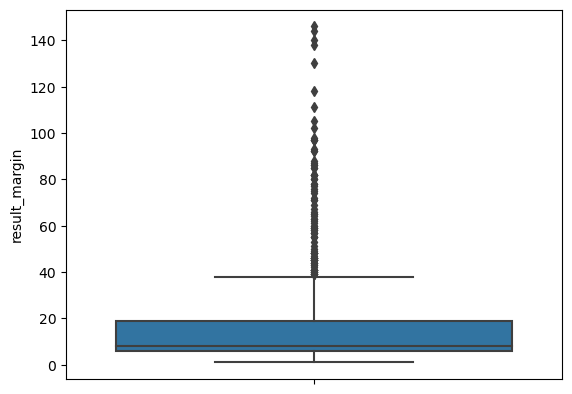

In [65]:
sns.boxplot(y='result_margin', data=df)

As we see there are many outliers so we use standard scaler to remove them

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()


x = df.drop(['winner'],axis=1)
y = df['winner']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

In [68]:
X_train[['result_margin']] = scaler.fit_transform(X_train[['result_margin']])
X_test[['result_margin']] = scaler.fit_transform(X_test[['result_margin']])

X_train.head()


,neutral_venue,toss_decision,result_margin,eliminator,method,result_runs,result_tie,result_wickets,city_Chandigarh,city_Chennai,...,team1_Sunrisers Hyderabad,team1_uncommon_team1,team2_Delhi Daredevils,team2_Kings XI Punjab,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Rajasthan Royals,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,team2_uncommon_team2
214,0,0,-0.446617,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
293,0,1,-0.446617,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
310,0,0,0.814850,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21,0,1,-0.345699,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
647,0,0,-0.597993,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
np.round(X_train.describe(),1)

,neutral_venue,toss_decision,result_margin,eliminator,method,result_runs,result_tie,result_wickets,city_Chandigarh,city_Chennai,...,team1_Sunrisers Hyderabad,team1_uncommon_team1,team2_Delhi Daredevils,team2_Kings XI Punjab,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Rajasthan Royals,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,team2_uncommon_team2
count,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,...,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0
mean,0.1,0.4,0.0,0.0,0.0,0.4,0.0,0.5,0.1,0.1,...,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
std,0.3,0.5,1.0,0.1,0.1,0.5,0.1,0.5,0.2,0.2,...,0.3,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
min,0.0,0.0,-0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,1.0,0.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,6.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [70]:
np.round(X_test.describe(),1)

,neutral_venue,toss_decision,result_margin,eliminator,method,result_runs,result_tie,result_wickets,city_Chandigarh,city_Chennai,...,team1_Sunrisers Hyderabad,team1_uncommon_team1,team2_Delhi Daredevils,team2_Kings XI Punjab,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Rajasthan Royals,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,team2_uncommon_team2
count,245.0,245.0,245.0,245.0,245.0,245.0,245.0,245.0,245.0,245.0,...,245.0,245.0,245.0,245.0,245.0,245.0,245.0,245.0,245.0,245.0
mean,0.1,0.4,-0.0,0.0,0.0,0.5,0.0,0.5,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
std,0.3,0.5,1.0,0.1,0.2,0.5,0.1,0.5,0.3,0.3,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
min,0.0,0.0,-0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,1.0,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,4.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


As you see all the data get Standarize and ready to put into our machine learning model

# Label Encoding For Target Variable

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [72]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [73]:
le.classes_

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

In [74]:
f = pd.DataFrame(y_train)
f1 = pd.DataFrame(y_test)

f.head()

,0
0,6
1,7
2,7
3,5
4,5


In [75]:
f1.head()

,0
0,11
1,0
2,10
3,3
4,0


As you see our Target Variable also converted into Numerical 

# Whole data is in Numeric Form now and ready for the process of  feature selection. 

# Target/Mean Encoding

* Target encoding that is also known as mean encoding uses target statistical measures like mean to encode categorical data into a numeric form for easy application in machine learning models.

* In target encoding, we first have to specify the target column and target variable. After this, mean of each target variable as per different categories is derived and then the category variable is replaced with its mean value. The variables are target correlated because each category is replaced with the posterior probability of the target.

In [76]:
df = pd.read_csv('tips.csv')
df.sample(4)

,total_bill,tip,sex,smoker,day,time,size
41,17.46,2.54,Male,No,Sun,Dinner,2
165,24.52,3.48,Male,No,Sun,Dinner,3
53,9.94,1.56,Male,No,Sun,Dinner,2
164,17.51,3.00,Female,Yes,Sun,Dinner,2


In [77]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Tip is our Target Variable 

In [78]:
import category_encoders as ce

# creating object/variable for Target Encoder

encoder = ce.TargetEncoder(cols=['smoker']) # column which you want to encode

# fit and transform data

data_en = encoder.fit_transform(df['smoker'],df['tip']) # column which you want to encode, target variable
data_en

,smoker
0,2.991854
1,2.991854
2,2.991854
3,2.991854
4,2.991854
...,...
239,2.991854
240,3.008703
241,3.008703
242,2.991854


* It takes mean of the all data points of 'tips' column correspondence to the 'Yes' category in smoker column
* It takes the mean of all data points of 'tips' column correspondence to the 'No' category in smoker column
* It replace the value with corresponding mean of each cateogry to target variable

In [79]:
df.drop('smoker',axis=1,inplace=True)

In [80]:
a = pd.DataFrame(data_en)
df = pd.concat([df,a], axis=1)
df.sample(3)

,total_bill,tip,sex,day,time,size,smoker
121,13.42,1.68,Female,Thur,Lunch,2,2.991854
8,15.04,1.96,Male,Sun,Dinner,2,2.991854
129,22.82,2.18,Male,Thur,Lunch,3,2.991854


In [81]:
encoder = ce.TargetEncoder(cols=['sex'])
data_en = encoder.fit_transform(df['sex'],df['tip'])
data_en

,sex
0,2.833651
1,3.089618
2,3.089618
3,3.089618
4,2.833651
...,...
239,3.089618
240,2.833651
241,3.089618
242,3.089618


In [82]:
df.drop('sex',axis=1,inplace=True)

In [83]:
a = pd.DataFrame(data_en)
df = pd.concat([df,a], axis=1)
df.sample(3)

,total_bill,tip,day,time,size,smoker,sex
20,17.92,4.08,Sat,Dinner,2,2.991854,3.089618
61,13.81,2.00,Sat,Dinner,2,3.008703,3.089618
47,32.40,6.00,Sun,Dinner,4,2.991854,3.089618


In [84]:
encoder = ce.TargetEncoder(cols=['day'])

data_en = encoder.fit_transform(df['day'],df['tip'])
data_en

,day
0,3.254185
1,3.254185
2,3.254185
3,3.254185
4,3.254185
...,...
239,2.993110
240,2.993110
241,2.993110
242,2.993110


In [85]:
df.drop('day',axis=1,inplace=True)

In [86]:
a = pd.DataFrame(data_en)
df = pd.concat([df,a], axis=1)
df.sample(3)

,total_bill,tip,time,size,smoker,sex,day
99,12.46,1.50,Dinner,2,2.991854,3.089618,2.873091
112,38.07,4.00,Dinner,3,2.991854,3.089618,3.254185
209,12.76,2.23,Dinner,2,3.008703,2.833651,2.993110


In [87]:
encoder = ce.TargetEncoder(cols=['time'])

data_en = encoder.fit_transform(df['time'],df['tip'])
data_en

,time
0,3.10267
1,3.10267
2,3.10267
3,3.10267
4,3.10267
...,...
239,3.10267
240,3.10267
241,3.10267
242,3.10267


In [88]:
df.drop('time',axis=1,inplace=True)

In [89]:
a = pd.DataFrame(data_en)
df = pd.concat([df,a], axis=1)
df.sample(3)

,total_bill,tip,size,smoker,sex,day,time
47,32.40,6.00,4,2.991854,3.089618,3.254185,3.102670
9,14.78,3.23,2,2.991854,3.089618,3.254185,3.102670
84,15.98,2.03,2,2.991854,3.089618,2.774803,2.730294


## Next Step is to standardize the data and prepare the data for the process of feature selection

# I perform both Target/Mean Encoding and One Hot Encoding

My Views on both:-
1. It's totatlly depends on our Data and it's particular variable/columns
2. We check whether the data type in a column is ordinal or nominal.
3. Both Encoders are useful at their own place.
4. Both Encoders have their pros and cons
5. My opion opion is that Target Encoding is much useful because it takes mean of the target variable and also perform encoding according to the target variable.